In [252]:
import numpy as np
import pandas as pd
import pickle 

from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score as r2,mean_absolute_error as mae,mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [253]:
def evaluate_preds(true_values,pred_values):
    print('R2\t'+str(round(r2(true_values,pred_values),3))+'\n'+
          'MAE\t'+str(round(mae(true_values,pred_values),3))+'\n'+
          'MSE\t'+str(round(mse(true_values,pred_values),3)))
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_values,y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [254]:
plt.style.use('fivethirtyeight')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
PREPARED_DATASET_PATH = 'train_prepared.csv'
df_train.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [255]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [256]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [257]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [258]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [259]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [260]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [261]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [262]:
df_train.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

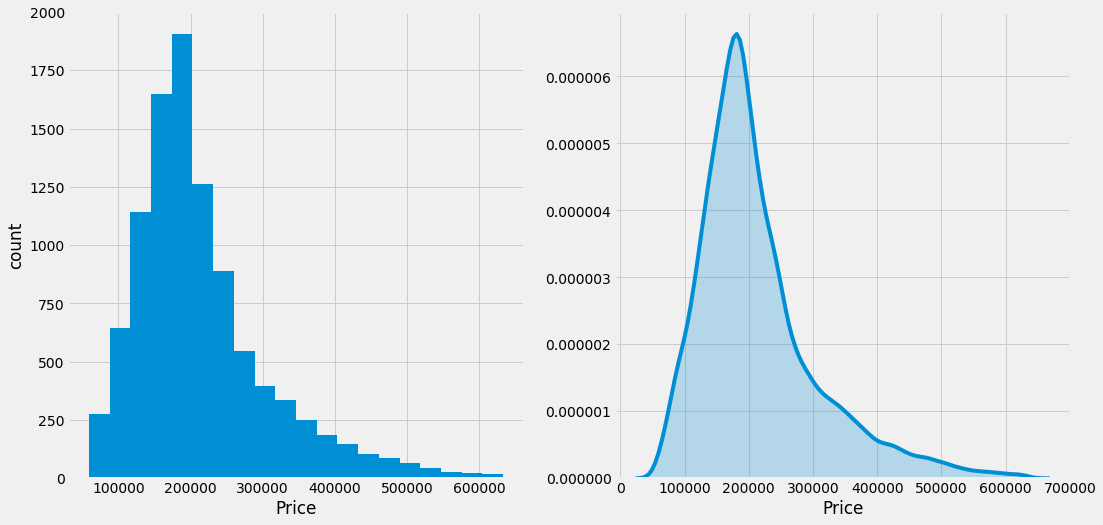

In [263]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

plt.figure(figsize=(16,8))

plt.subplot(121)
df_train['Price'].hist(bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'],shade=True,legend=False)
plt.xlabel('Price')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C219159D88>,
      dtype=object)

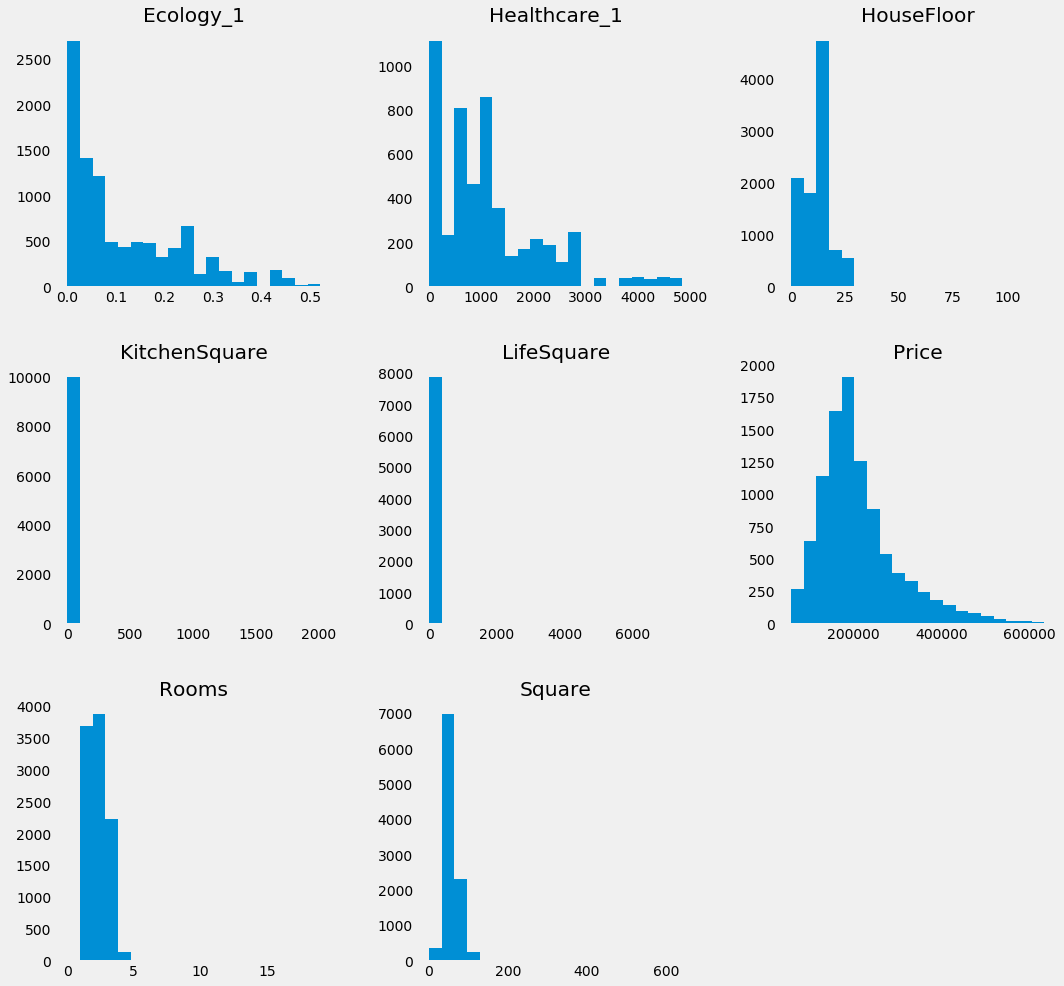

In [264]:
df_num_features= df_train.select_dtypes(include='float64')
df_num_features.hist(figsize=(16,16),bins=20,grid=False)

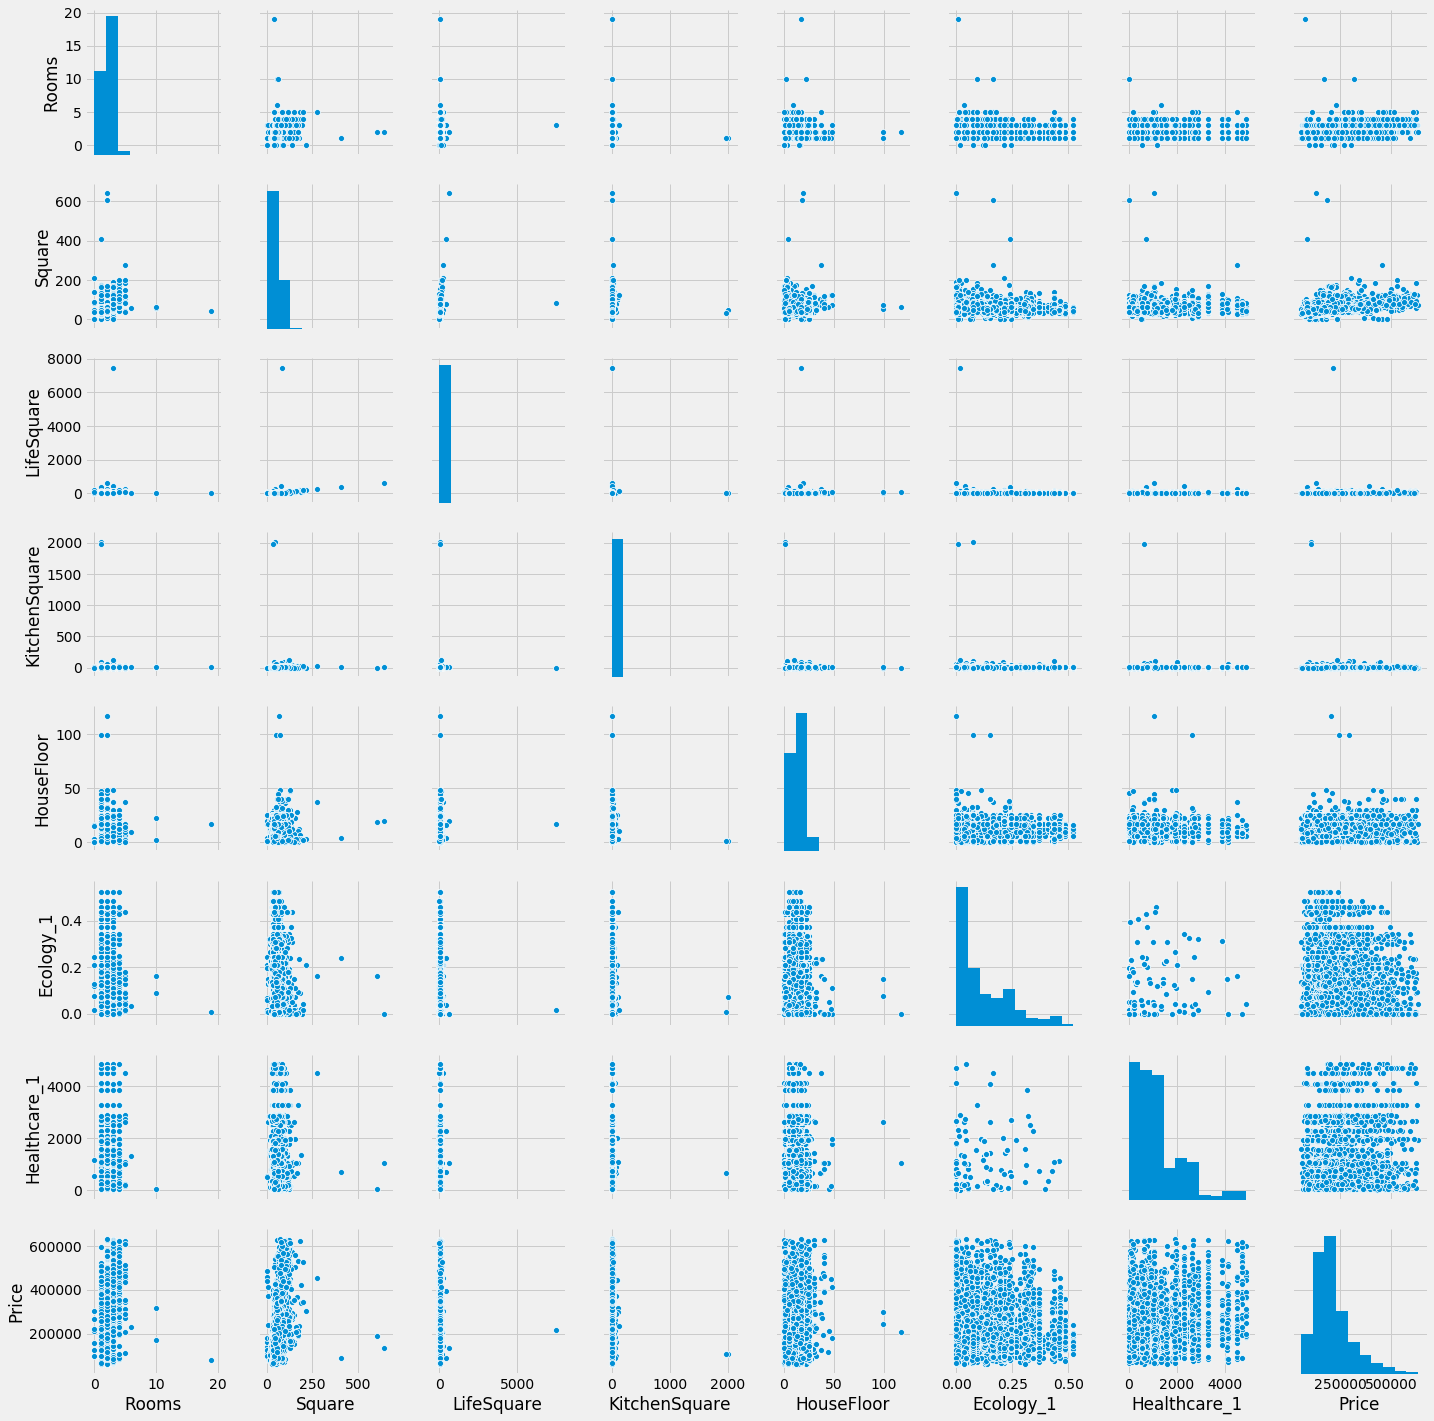

In [265]:
sns.pairplot(df_num_features);

In [266]:
df_train.loc[df_train['LifeSquare'].isnull(),'LifeSquare']=df_train['LifeSquare'].median()

In [267]:
df_train.loc[df_train['Healthcare_1'].isnull(),'Healthcare_1']=df_train['Healthcare_1'].median()

In [268]:
df_train.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

#  Убрать

In [269]:
df_train[df_train['Square']<=df_train['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,900.0,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


In [270]:
IQ=df_train.Square.describe()['75%']-df_train.Square.describe()['25%']
low_border=df_train.Square.describe()['25%']-IQ*1.5
high_border=df_train.Square.describe()['75%']+IQ*1.5

In [271]:
print(IQ,low_border,high_border)

24.125744426186976 5.586264180189367 102.08924188493728


In [272]:
df_train[(df_train['Square']<low_border)|(df_train['Square']>high_border)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
19,4909,19,3.0,110.959792,56.996765,11.0,16,25.0,2012,0.000991,B,B,33,6783,3,900.0,1,9,B,394895.325987
20,8862,0,3.0,103.605292,47.799426,10.0,12,17.0,2002,0.319809,B,B,25,4756,16,2857.0,5,8,B,521919.057400
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,13630,24,3.0,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.0,2,3,B,611250.912034
9852,16641,111,4.0,117.201937,69.898092,14.0,4,2.0,2017,0.093443,B,B,23,4635,5,3300.0,2,4,B,197593.112769
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


In [273]:
df_train[df_train['Square']<=df_train['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,900.0,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


In [274]:
IQ=df_train.LifeSquare.describe()['75%']-df_train.LifeSquare.describe()['25%']
low_border=df_train.LifeSquare.describe()['25%']-IQ*1.5
high_border=df_train.LifeSquare.describe()['75%']+IQ*1.5

In [275]:
print(IQ,low_border,high_border)

15.899834993080145 1.6776461714428486 65.27698614376342


In [276]:
df_train[(df_train['LifeSquare']<low_border)|(df_train['LifeSquare']>high_border)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
71,2136,74,2.0,84.687732,81.905552,0.0,12,17.0,2017,0.075779,B,B,6,1437,3,900.0,0,2,B,243479.876105
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681
131,10726,27,3.0,89.692964,87.623814,1.0,13,1.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,265978.837780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,16641,111,4.0,117.201937,69.898092,14.0,4,2.0,2017,0.093443,B,B,23,4635,5,3300.0,2,4,B,197593.112769
9878,11441,62,2.0,71.985335,72.453232,0.0,5,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,158841.624543
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


In [278]:
df_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,900.0,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,32.781260,1.0,12,16.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [279]:
df_train.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [316]:
df_train['Price'].value_counts()

207103.209097    1
179485.931037    1
456417.428803    1
149480.126085    1
245157.999097    1
                ..
503712.153979    1
136545.287962    1
487300.561351    1
176072.619971    1
217669.112875    1
Name: Price, Length: 10000, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C21F555208>,
      dtype=object)

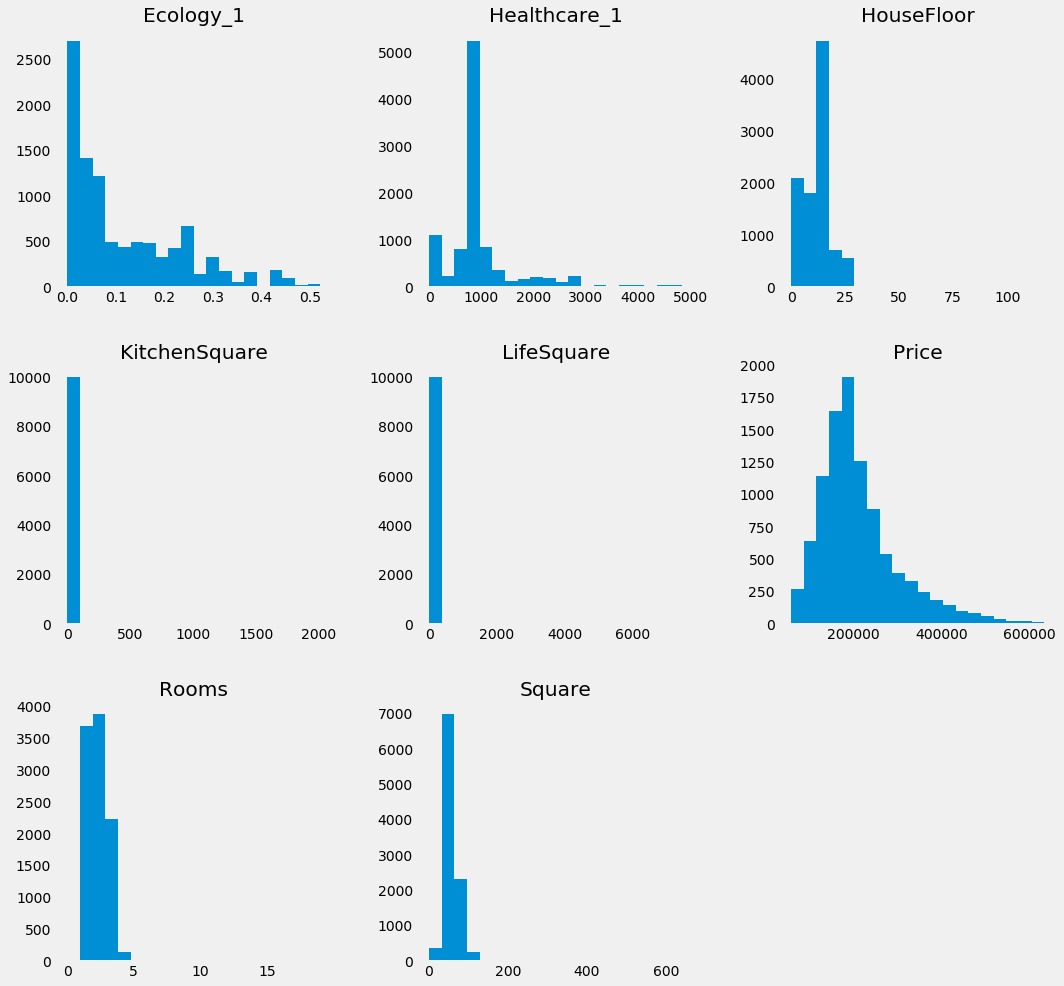

In [318]:
df_num_features= df_train.select_dtypes(include='float64')
df_num_features.hist(figsize=(16,16),bins=20,grid=False)

In [320]:
df_train.loc[df_train['Ecology_2'] == 'B', 'Ecology_2'] = 1
df_train.loc[df_train['Ecology_2'] == 'A', 'Ecology_2'] = 2
df_train.loc[df_train['Ecology_3'] == 'B', 'Ecology_3'] = 1
df_train.loc[df_train['Ecology_3'] == 'A', 'Ecology_3'] = 2
df_train.loc[df_train['Shops_2'] == 'B', 'Shops_2'] = 1
df_train.loc[df_train['Shops_2'] == 'A', 'Shops_2'] = 2

In [322]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [323]:
feature_names=['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']
target_name='Price'


In [357]:
X=df_train[feature_names]
y=df_train[target_name]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,shuffle=True,random_state=42)

R2	0.523
MAE	44527.355
MSE	4113909046.122


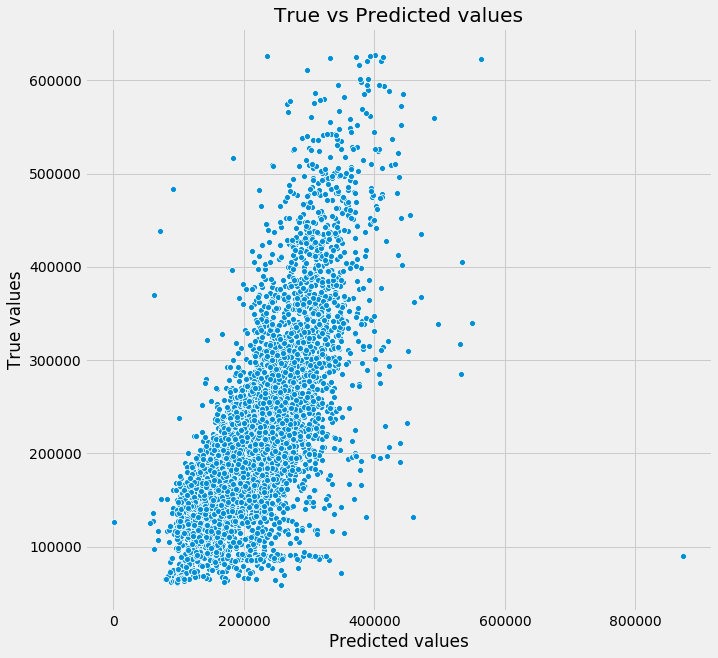

In [358]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_train_preds=lr_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)


R2	0.413
MAE	45724.952
MSE	5062806640.855


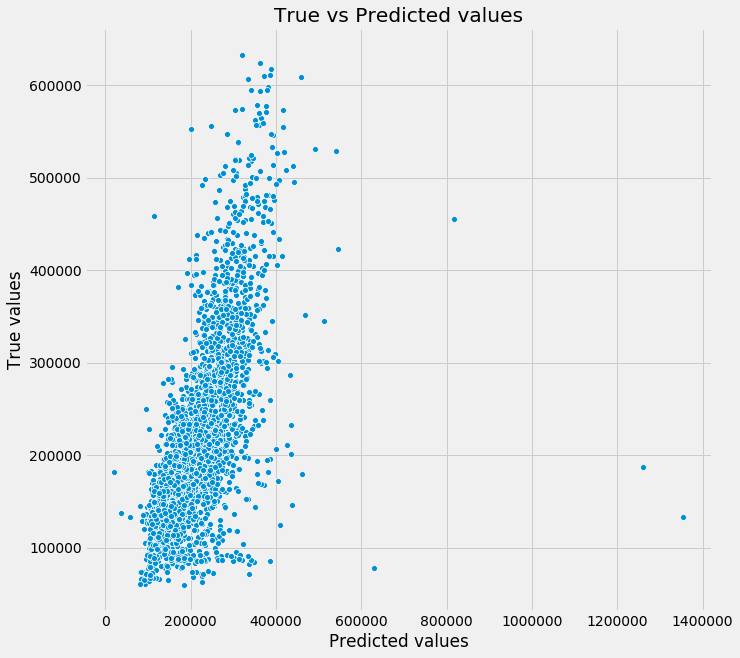

In [359]:
y_test_preds=lr_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

R2	0.946
MAE	12190.093
MSE	467753710.526


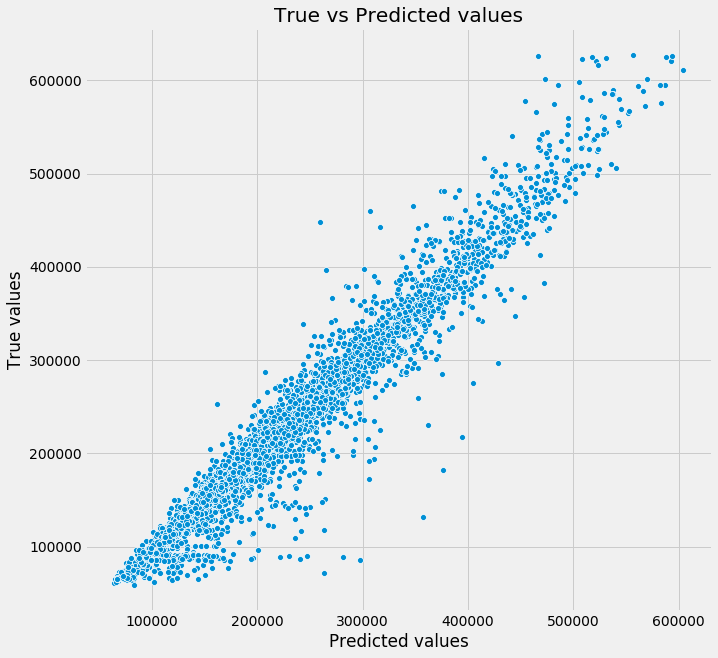

In [360]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_train_preds=rf_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.671
MAE	31476.509
MSE	2841023962.982


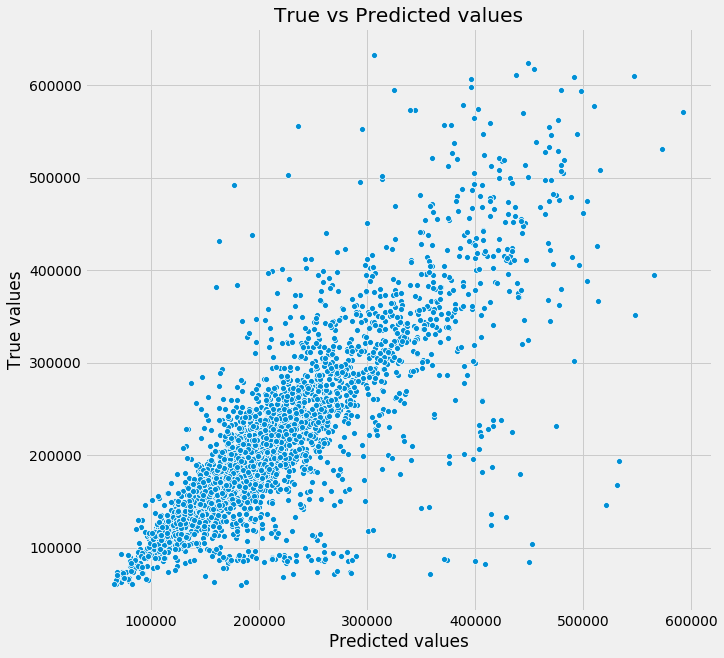

In [361]:
y_test_preds=rf_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

R2	0.776
MAE	28657.928
MSE	1932036824.752


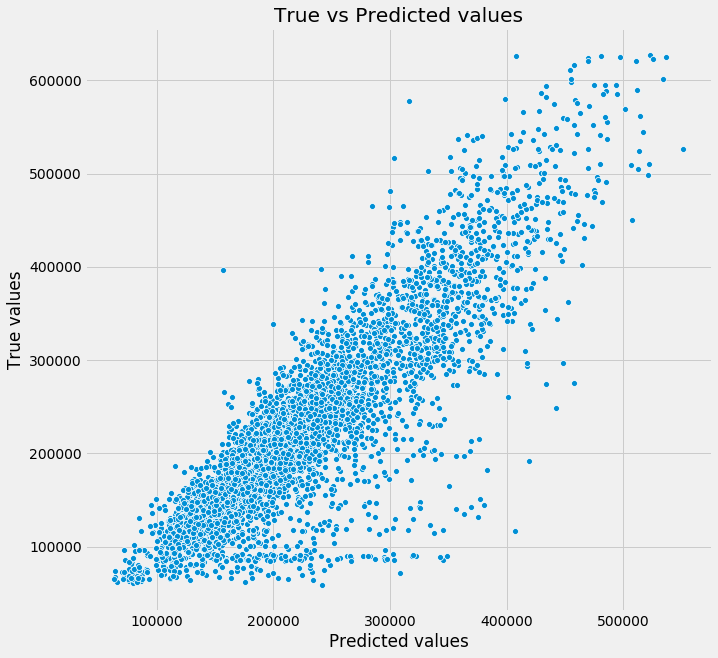

In [362]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
y_train_preds=gb_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.7
MAE	31176.667
MSE	2590001240.262


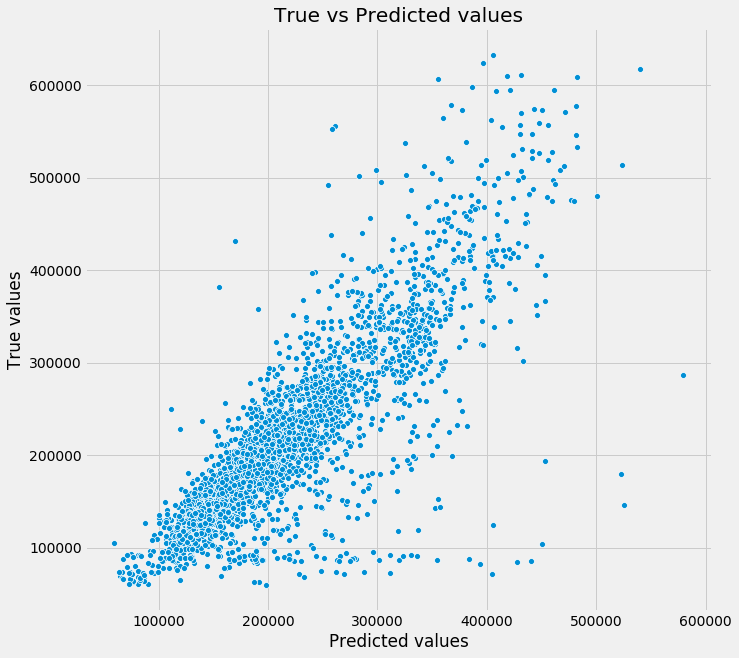

In [363]:
y_test_preds=gb_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [364]:
gb_model=GradientBoostingRegressor(random_state=30)

params={'n_estimators':[50,100,200],
        'max_depth':[3,5,7]}
gs=GridSearchCV(gb_model,params,scoring='r2',cv=KFold(n_splits=3,random_state=21,shuffle=True),n_jobs=-1)
gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [365]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [366]:
gs.best_score_

0.7406574940505645

In [367]:
final_model=GradientBoostingRegressor(n_estimators=100,max_depth=7,random_state=21)
final_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2	0.94
MAE	15416.056
MSE	519909088.488


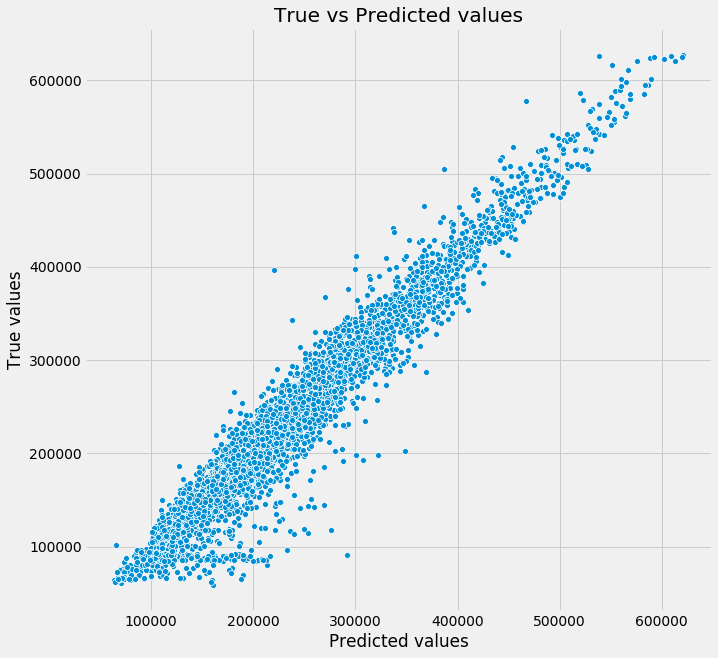

In [368]:
y_train_preds=final_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.716
MAE	28516.273
MSE	2452641209.584


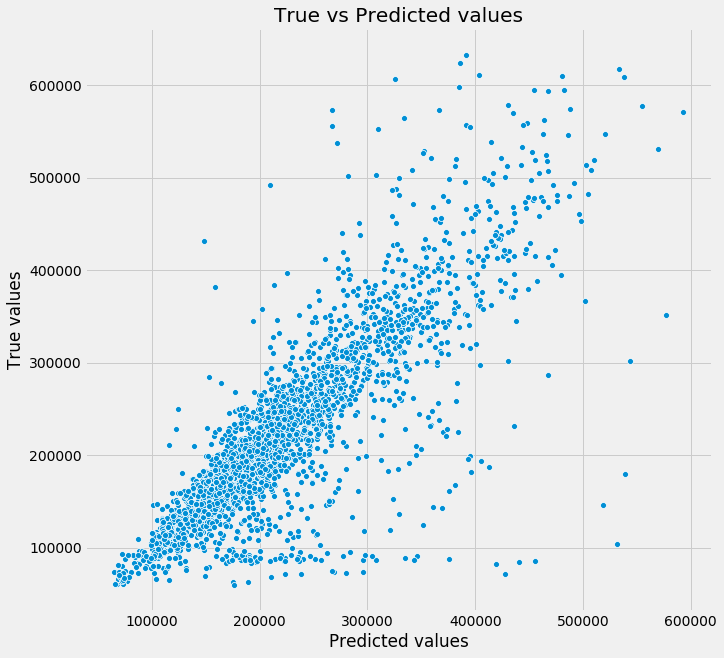

In [369]:
y_test_preds=final_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [370]:
feature_importances=pd.DataFrame(zip(X_train.columns,final_model.feature_importances_),columns=['feature_name','importance'])
feature_importances.sort_values(by='importance',ascending=False)


,feature_name,importance
3,Square,0.401415
13,Social_2,0.109345
12,Social_1,0.078270
14,Social_3,0.073219
2,Rooms,0.072959
1,DistrictId,0.047799
9,Ecology_1,0.044632
8,HouseYear,0.033036
4,LifeSquare,0.027437
6,Floor,0.022712


In [371]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(8), int64(12)
memory usage: 1.5 MB


In [372]:
with open(MODEL_FILE_PATH,'wb') as file:
    pickle.dump(final_model,file)

In [373]:
MODEL_FILE_PATH='model.pkl'
with open(MODEL_FILE_PATH,'wb') as file:
    pickle.dump(final_model,file)

In [374]:
model=pd.read_pickle('model.pkl')

In [375]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [376]:
df_test.loc[df_test['Healthcare_1'].isnull(),'Healthcare_1']=df_test['Healthcare_1'].median()

In [377]:
df_test.loc[df_test['LifeSquare'].isnull(),'LifeSquare']=df_test['LifeSquare'].median()

In [378]:
df_test.loc[df_test['Ecology_2'] == 'B', 'Ecology_2'] = 1
df_test.loc[df_test['Ecology_2'] == 'A', 'Ecology_2'] = 2
df_test.loc[df_test['Ecology_3'] == 'B', 'Ecology_3'] = 1
df_test.loc[df_test['Ecology_3'] == 'A', 'Ecology_3'] = 2
df_test.loc[df_test['Shops_2'] == 'B', 'Shops_2'] = 1
df_test.loc[df_test['Shops_2'] == 'A', 'Shops_2'] = 2
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,2


In [387]:
test = model.predict(df_test)

In [396]:
print(test)

[159073.42790333 213567.13971034 190671.72387834 ... 313025.91542348
 206957.27633477 175826.10188765]


In [399]:
test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'